# Analysing the water quality of India:


In [4]:
import numpy as np 
import pandas as pd
data = pd.read_csv("IndiaAffectedWaterQualityAreas.csv",encoding='latin1')
data.head()


,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
data.columns


Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')

In [7]:
data['State Name'].unique()

array(['ANDHRA PRADESH', 'ASSAM', 'ARUNACHAL PRADESH', 'BIHAR', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'KARNATAKA',
       'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MEGHALAYA', 'NAGALAND',
       'ORISSA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL', 'CHATTISGARH',
       'JHARKHAND', 'UTTARAKHAND', 'MANIPUR', 'CHHATTISGARH'],
      dtype=object)

In [8]:
data['State Name'].value_counts()

RAJASTHAN            131417
BIHAR                 92336
ASSAM                 79910
ORISSA                68620
KARNATAKA             30824
WEST BENGAL           30101
TRIPURA               26235
CHATTISGARH           25062
MADHYA PRADESH        14449
MAHARASHTRA           12480
UTTAR PRADESH          9918
CHHATTISGARH           8815
KERALA                 4800
JHARKHAND              3913
TAMIL NADU             3164
ANDHRA PRADESH         2888
GUJARAT                2092
PUNJAB                 1056
NAGALAND                618
ARUNACHAL PRADESH       612
MEGHALAYA               427
HARYANA                 262
HIMACHAL PRADESH         88
JAMMU AND KASHMIR        67
UTTARAKHAND              57
PUDUCHERRY               17
MANIPUR                  14
Name: State Name, dtype: int64

In [9]:
data['Quality Parameter'].value_counts()

Iron        302244
Salinity    108923
Fluoride    101041
Arsenic      25705
Nitrate      12329
Name: Quality Parameter, dtype: int64

In [10]:
data.describe()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
count,550242,550242,550242,550242,550242,550242,550242,550242
unique,27,493,3577,37471,81703,147566,5,4
top,RAJASTHAN,BARMER,BALESAR,RATANPUR,RAMPUR,HARIJAN TOLA,Iron,1/4/2009
freq,131417,43752,8358,797,691,3072,302244,179999


In [11]:
data['Quality Parameter'].groupby(data['State Name']).describe()

,count,unique,top,freq
State Name,,,,
ANDHRA PRADESH,2888,2,Fluoride,2193
ARUNACHAL PRADESH,612,1,Iron,612
ASSAM,79910,3,Iron,74098
BIHAR,92336,4,Iron,69970
CHATTISGARH,25062,5,Iron,24439
CHHATTISGARH,8815,3,Iron,8339
GUJARAT,2092,4,Fluoride,804
HARYANA,262,2,Fluoride,244
HIMACHAL PRADESH,88,3,Salinity,72


In [12]:
data.groupby('State Name').size()

State Name
ANDHRA PRADESH         2888
ARUNACHAL PRADESH       612
ASSAM                 79910
BIHAR                 92336
CHATTISGARH           25062
CHHATTISGARH           8815
GUJARAT                2092
HARYANA                 262
HIMACHAL PRADESH         88
JAMMU AND KASHMIR        67
JHARKHAND              3913
KARNATAKA             30824
KERALA                 4800
MADHYA PRADESH        14449
MAHARASHTRA           12480
MANIPUR                  14
MEGHALAYA               427
NAGALAND                618
ORISSA                68620
PUDUCHERRY               17
PUNJAB                 1056
RAJASTHAN            131417
TAMIL NADU             3164
TRIPURA               26235
UTTAR PRADESH          9918
UTTARAKHAND              57
WEST BENGAL           30101
dtype: int64

In [13]:


import dateutil
data['date'] = data['Year'].apply(dateutil.parser.parse)
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month



In [14]:
State_Data = data[['State Name', 'Quality Parameter']]
import sklearn
from sklearn.preprocessing import LabelEncoder
numbers = LabelEncoder()

In [16]:
State_Data['Quality'] = numbers.fit_transform(State_Data['Quality Parameter'])

/home/harshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
Group1 = State_Data.groupby(['State Name','Quality Parameter','Quality']).count().reset_index()
Group1

,State Name,Quality Parameter,Quality
0,ANDHRA PRADESH,Fluoride,1
1,ANDHRA PRADESH,Salinity,4
2,ARUNACHAL PRADESH,Iron,2
3,ASSAM,Arsenic,0
4,ASSAM,Fluoride,1
5,ASSAM,Iron,2
6,BIHAR,Arsenic,0
7,BIHAR,Fluoride,1
8,BIHAR,Iron,2
9,BIHAR,Nitrate,3


In [20]:
State_Quality_Count = pd.DataFrame({'count' : State_Data.groupby( [ "State Name", "Quality","Quality Parameter"] ).size()}).reset_index()
State_Quality_Count


,State Name,Quality,Quality Parameter,count
0,ANDHRA PRADESH,1,Fluoride,2193
1,ANDHRA PRADESH,4,Salinity,695
2,ARUNACHAL PRADESH,2,Iron,612
3,ASSAM,0,Arsenic,4775
4,ASSAM,1,Fluoride,1037
5,ASSAM,2,Iron,74098
6,BIHAR,0,Arsenic,6215
7,BIHAR,1,Fluoride,16150
8,BIHAR,2,Iron,69970
9,BIHAR,3,Nitrate,1


In [21]:
TAMIL_NADU   =  State_Quality_Count[State_Quality_Count["State Name"] == "TAMIL NADU"]    
ANDHRA_PRADESH = State_Quality_Count[State_Quality_Count["State Name"] == "ANDHRA PRADESH"]
KERALA = State_Quality_Count[State_Quality_Count["State Name"] == "KERALA"]
KARNATAKA = State_Quality_Count[State_Quality_Count["State Name"] == "KARNATAKA"]
GUJARAT = State_Quality_Count[State_Quality_Count["State Name"] == "GUJARAT"]
MAHARASHTRA = State_Quality_Count[State_Quality_Count["State Name"] == "MAHARASHTRA"]

In [22]:
TAMIL_NADU

,State Name,Quality,Quality Parameter,count
72,TAMIL NADU,1,Fluoride,77
73,TAMIL NADU,2,Iron,2119
74,TAMIL NADU,3,Nitrate,116
75,TAMIL NADU,4,Salinity,852


Text(0.5,1,'Water Quality Parameter In Tamil Nadu')

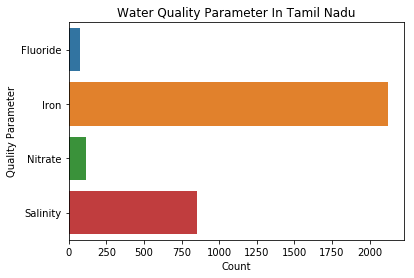

In [23]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="count", y ="Quality Parameter", data = TAMIL_NADU)
ax.set(xlabel='Count')
plt.title("Water Quality Parameter In Tamil Nadu")

Text(0.5,1,'Water Quality Parameter In Andhra Pradesh')

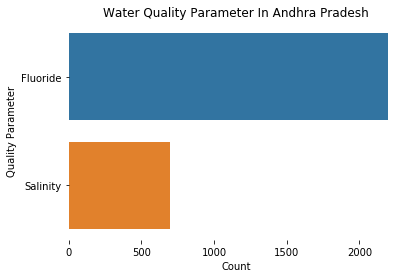

In [24]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="count", y ="Quality Parameter", data = ANDHRA_PRADESH)
ax.set(xlabel='Count')
sns.despine(left=True, bottom=True)
plt.title("Water Quality Parameter In Andhra Pradesh")


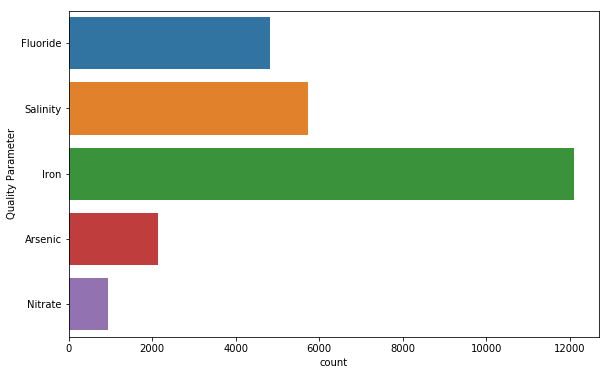

In [25]:
x = State_Quality_Count.groupby('State Name')
plt.rcParams['figure.figsize'] = (9.5, 6.0)
genre_count = sns.barplot(y='Quality Parameter', x='count', data=State_Quality_Count, ci=None)
plt.show()

# Now, We are going to analyse on another data


In [5]:
import numpy as np
import pandas as pd 
data1=pd.read_csv("water_dataX.csv", encoding='unicode_escape')
data1.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [6]:
data1.dtypes


STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [7]:
data1['Temp']=pd.to_numeric(data1['Temp'],errors='coerce')
data1['D.O. (mg/l)']=pd.to_numeric(data1['D.O. (mg/l)'],errors='coerce')
data1['PH']=pd.to_numeric(data1['PH'],errors='coerce')
data1['B.O.D. (mg/l)']=pd.to_numeric(data1['B.O.D. (mg/l)'],errors='coerce')
data1['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data1['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data1['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data1['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data1['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data1['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data1.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [8]:
start=2
end=1779
station=data1.iloc [start:end ,0]
location=data1.iloc [start:end ,1]
state=data1.iloc [start:end ,2]
do= data1.iloc [start:end ,4].astype(np.float64)
value=0
ph = data1.iloc[ start:end,5]  
co = data1.iloc [start:end ,6].astype(np.float64)   
  
year=data1.iloc[start:end,11]
tc=data1.iloc [2:end ,10].astype(np.float64)


bod = data1.iloc [start:end ,7].astype(np.float64)
na= data1.iloc [start:end ,8].astype(np.float64)
na.dtype


dtype('float64')

In [9]:
data1=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data1. columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [11]:
#calulation of Ph
data1['npH']=data1.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [12]:
#calculation of dissolved oxygen
data1['ndo']=data1.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [14]:
#calculation of total coliform
data1['nco']=data1.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [15]:
#calc of B.D.O
data1['nbdo']=data1.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [16]:
#calculation of electrical conductivity
data1['nec']=data1.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [17]:
#Calulation of nitrate
data1['nna']=data1.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data1.head()
data1.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [18]:
data1['wph']=data1.npH * 0.165
data1['wdo']=data1.ndo * 0.281
data1['wbdo']=data1.nbdo * 0.234
data1['wec']=data1.nec* 0.009
data1['wna']=data1.nna * 0.028
data1['wco']=data1.nco * 0.281
data1['wqi']=data1.wph+data1.wdo+data1.wbdo+data1.wec+data1.wna+data1.wco

In [19]:
data1.head()

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44


In [20]:
ag=data1.groupby('year')['wqi'].mean()

In [21]:
print(ag.head())

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
Name: wqi, dtype: float64


In [25]:
data1=ag.reset_index(level=0,inplace=False)

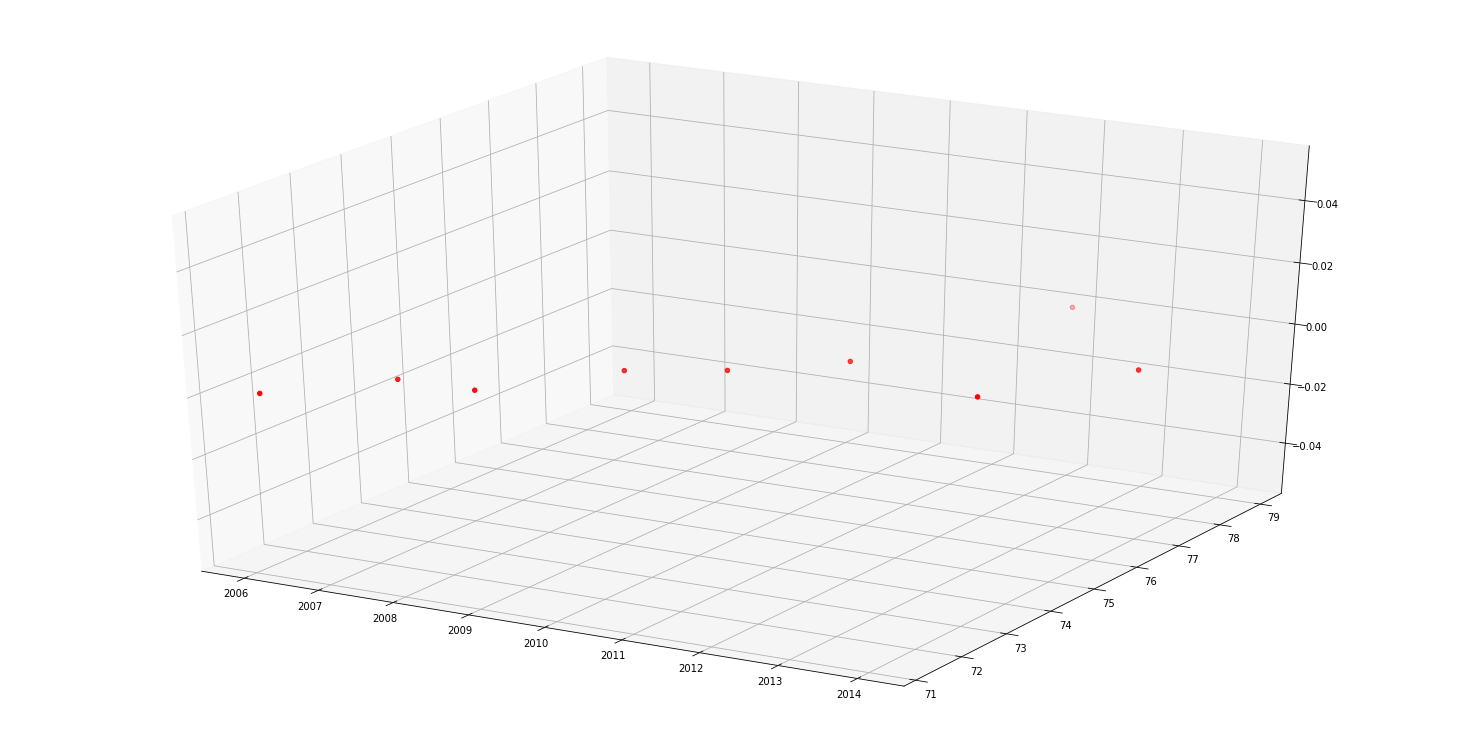

In [26]:
year=data1['year'].values
AQI=data1['wqi'].values
data1['wqi']=pd.to_numeric(data1['wqi'],errors='coerce')
data1['year']=pd.to_numeric(data1['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()

In [27]:
data1 = data1[np.isfinite(data1['wqi'])]
data1.head()


,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723


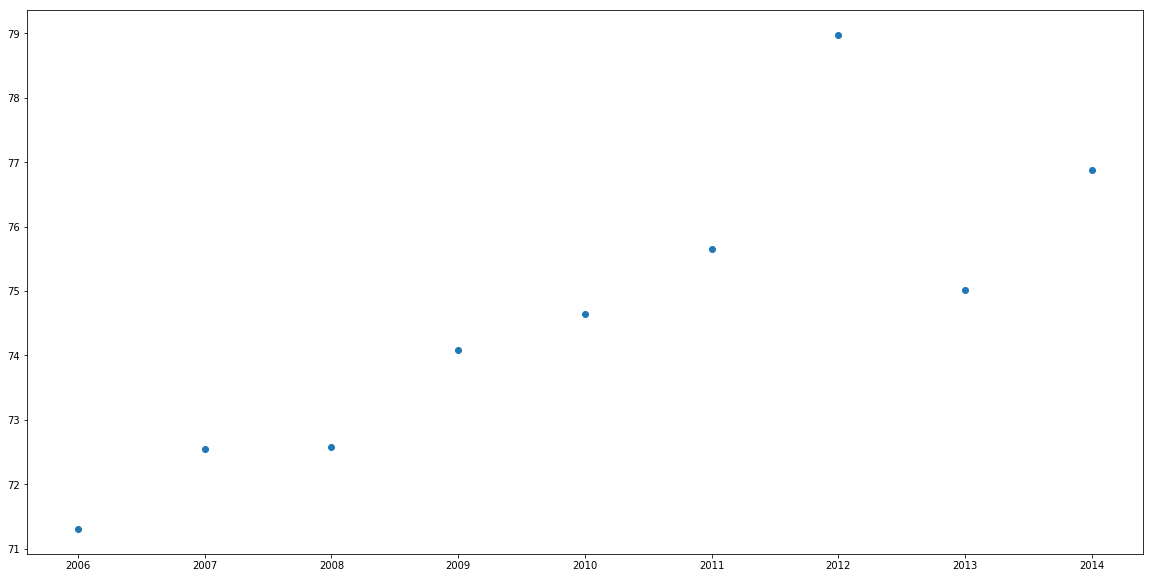

In [28]:
cols =['year']
y = data1['wqi']
x=data1[cols]

plt.scatter(x,y)
plt.show()


In [29]:
from sklearn import neighbors,datasets
data1=data1.reset_index(level=0,inplace=False)

In [30]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

/home/harshi/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
cols =['year']
y = data1['wqi']
x=data1[cols]


In [41]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)



In [42]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
pred=reg.predict(x_test)

In [47]:
print(pred,y_test)

[73.86206246 74.59948715] 3    74.085193
4    74.648723
Name: wqi, dtype: float64


In [48]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,pred))

mse:0.03


In [49]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': pred}) 

In [50]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.46059349],
       [ 1.        , -1.09544512],
       [ 1.        , -0.73029674],
       [ 1.        , -0.36514837],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.36514837],
       [ 1.        ,  0.73029674],
       [ 1.        ,  1.09544512],
       [ 1.        ,  1.46059349]])

In [51]:
alpha = 0.1 #Step size
iterations = 3000 
m = y.size 
np.random.seed(4) 
theta = np.random.rand(2) 

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]


print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 74.63, 2.01


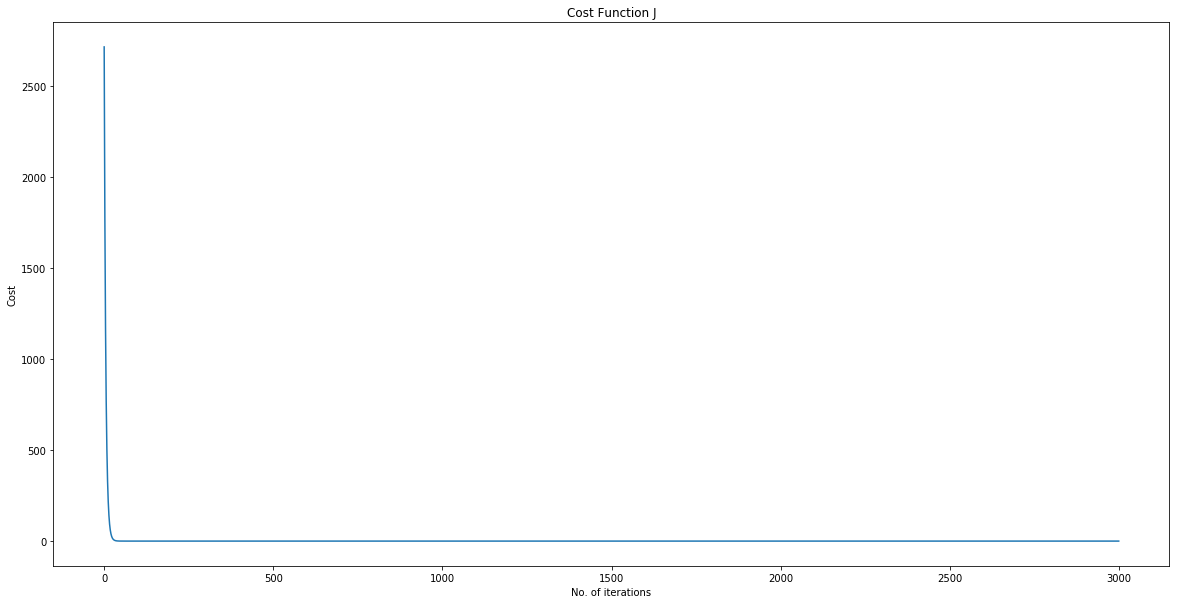

In [52]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()


In [53]:
import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt

,year,wqi,Actual,Predicted
0,2006,71.308824,71.308824,71.648936
1,2007,72.549000,72.549000,72.426702
2,2008,72.570943,72.570943,73.204468
3,2009,74.085193,74.085193,73.982234
4,2010,74.648723,74.648723,74.760000
5,2011,75.647013,75.647013,75.537766
6,2012,78.969041,78.969041,76.315532
7,2013,75.009425,75.009425,77.093298
8,2014,76.879588,76.879588,77.871064


In [54]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.1987755149740886


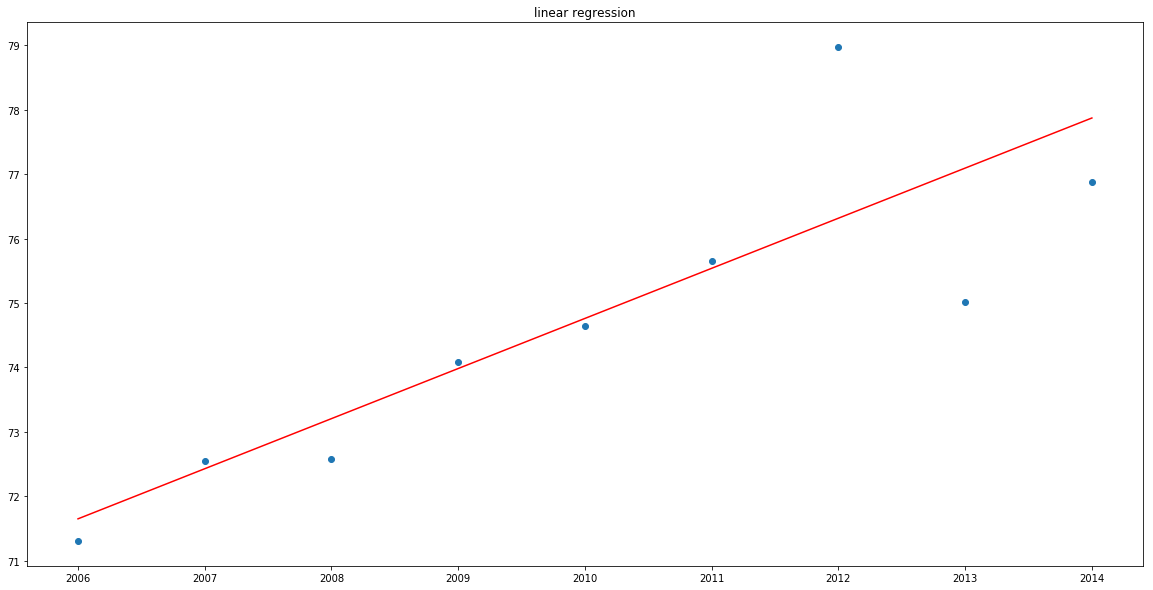

In [55]:
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()